## Objective
* __Create your own dataset that contains a random sample of reviews__

## Workflow

1. Read the video game review data. Take a look at the text of the reviews and the ratings, which you will work with in this milestone.Note that your data is not pure JSON, but new line delimited JSON. To be able to read it, install and import  <span style="color:red">ndjson</span>.
2. Create a plot of the ratings of the product. Study the distribution of the five categories.
3. Take a random sample of the reviews by selecting 1500 reviews with rating 1, 500-500-500 reviews with ratings 2, 3, 4, and 1500 reviews with rating 5. This way you get a smaller __balanced__ corpus, on which you will during Milestones 2-4. 
4. Take a random sample of the reviews by selecting 100,000 reviews. This way you get a bigger representative corpus, on which you will work in Milestones 4 and 5.
    * If you want to get identical results that are provided as a sample solution, use 42 as a random state.
5. Export your corpora to two separate .csv files. Both of your tables should contain a column for the reviews and a column for the ratings. From now on we call the review text of the JSON key “reviews” and the overall key “ratings.” Name your corpora small_corpus and big_corpus.


In [1]:
import ndjson
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# reading reviews from json file
with open('../data/Video_Games_5.json') as f:
    data = ndjson.load(f)

In [3]:
reviews_df = pd.DataFrame(data)

In [4]:
reviews_df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,NaN,NaN,NaN
1,4.0,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,NaN,NaN,NaN
2,3.0,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,NaN,NaN,NaN
3,2.0,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,NaN,NaN,NaN
4,5.0,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600,NaN,NaN,NaN


### Data Dictionry
   * __reviewerID__ - ID of the reviewer, e.g. A2SUAM1J3GNN3B
   * __asin__ - ID of the product, e.g. 0000013714
   * **reviewerName** - name of the reviewer
   * **vote** - helpful votes of the review
   * **style** - a disctionary of the product metadata, e.g., "Format" is "Hardcover"
   * **reviewText** - text of the review
   * **overall** - rating of the product
   * **summary** - summary of the review
   * **unixReviewTime** - time of the review (unix time)
   * **reviewTime** - time of the review (raw)
   * **image** - images that users post after they have received the product


In [5]:
reviews_df.shape

(497577, 12)

In [6]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497577 entries, 0 to 497576
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         497577 non-null  float64
 1   verified        497577 non-null  bool   
 2   reviewTime      497577 non-null  object 
 3   reviewerID      497577 non-null  object 
 4   asin            497577 non-null  object 
 5   reviewerName    497501 non-null  object 
 6   reviewText      497419 non-null  object 
 7   summary         497468 non-null  object 
 8   unixReviewTime  497577 non-null  int64  
 9   vote            107793 non-null  object 
 10  style           289237 non-null  object 
 11  image           3634 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 42.2+ MB


<Axes: xlabel='overall', ylabel='count'>

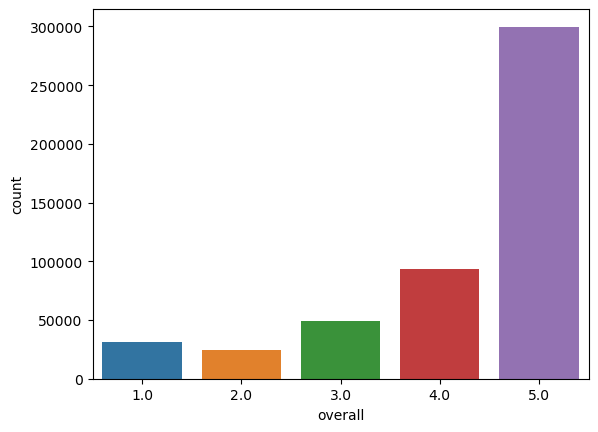

In [7]:
sns.countplot(data = reviews_df, x='overall')

In [8]:
len(reviews_df['asin'].value_counts(dropna=False))

17408

### Undersampling of Reviews
Taking a random sample of the reviews by selecting 1500 reviews with rating 1, 500-500-500 reviews with ratings 2, 3, 4, and 1500 reviews with rating 5. This way you get a smaller balanced corpus, on which you will during Milestones 2-4.


In [10]:
one_1500 = reviews_df[reviews_df['overall']==1.0].sample(n=1500)
two_500 = reviews_df[reviews_df['overall']==2.0].sample(n=500)
three_500 = reviews_df[reviews_df['overall']==3.0].sample(n=500)
four_500 = reviews_df[reviews_df['overall']==4.0].sample(n=500)
five_1500 = reviews_df[reviews_df['overall']==5.0].sample(n=1500)

In [11]:
one_1500.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
49809,1.0,False,"01 9, 2007",A1V759M5PMHL3Q,B0000AFWWH,JB,"Before purchasing this product, do a quick web...",Disappointed,1168300800,14,"{'Edition:': ' 10th Anniversary', 'Platform:':...",NaN
173599,1.0,False,"09 20, 2015",A1ITVHRZE96PW5,B001DT02JG,Y Chromosome 99,Console 1 needed to be replaced because the d...,Has not been good to me. This is worth your ti...,1442707200,NaN,NaN,NaN
271198,1.0,True,"03 23, 2013",AAFITF9VJD8DL,B007FTE2VW,Khatsalano,The game doesn't work because so many basic me...,EA didn't test the product,1363996800,11,{'Format:': ' Video Game'},NaN
396544,1.0,False,"12 10, 2015",AYAGJRPQG9ILX,B00W8FYF4W,E. Settle,If you like games with Amazing graphics and pr...,EA managed to screw up another brand,1449705600,8,"{'Edition:': ' Standard', 'Platform:': ' PC'}",NaN
212823,1.0,False,"02 13, 2016",A290SKKXNSQVDC,B003O6E800,Dillon Stenberg,Enjoy pocketing the extra cash while you can g...,Ridiculous Price Gouging,1455321600,2,{'Format:': ' Video Game'},NaN


In [12]:
undersampled_reviews = pd.concat([one_1500, two_500, three_500, four_500, five_1500], axis=0)

In [13]:
undersampled_reviews.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
49809,1.0,False,"01 9, 2007",A1V759M5PMHL3Q,B0000AFWWH,JB,"Before purchasing this product, do a quick web...",Disappointed,1168300800,14,"{'Edition:': ' 10th Anniversary', 'Platform:':...",NaN
173599,1.0,False,"09 20, 2015",A1ITVHRZE96PW5,B001DT02JG,Y Chromosome 99,Console 1 needed to be replaced because the d...,Has not been good to me. This is worth your ti...,1442707200,NaN,NaN,NaN
271198,1.0,True,"03 23, 2013",AAFITF9VJD8DL,B007FTE2VW,Khatsalano,The game doesn't work because so many basic me...,EA didn't test the product,1363996800,11,{'Format:': ' Video Game'},NaN
396544,1.0,False,"12 10, 2015",AYAGJRPQG9ILX,B00W8FYF4W,E. Settle,If you like games with Amazing graphics and pr...,EA managed to screw up another brand,1449705600,8,"{'Edition:': ' Standard', 'Platform:': ' PC'}",NaN
212823,1.0,False,"02 13, 2016",A290SKKXNSQVDC,B003O6E800,Dillon Stenberg,Enjoy pocketing the extra cash while you can g...,Ridiculous Price Gouging,1455321600,2,{'Format:': ' Video Game'},NaN


In [30]:
undersampled_reviews['overall'].value_counts(dropna=False)

overall
1.0    1500
5.0    1500
2.0     500
3.0     500
4.0     500
Name: count, dtype: int64

<Axes: xlabel='overall', ylabel='count'>

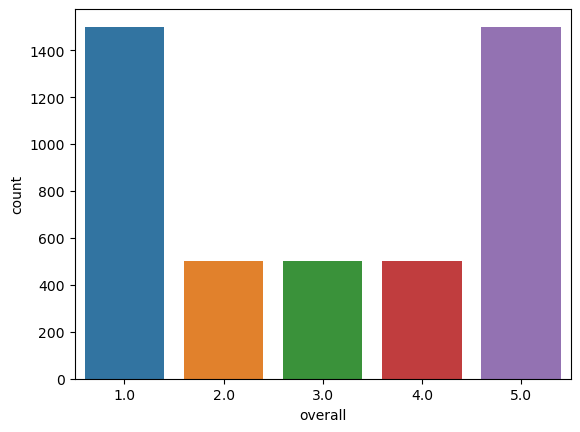

In [14]:
sns.countplot(data=undersampled_reviews, x='overall')

### Random Sampling of 100K Reviews

In [15]:
sample_100K_revs = reviews_df.sample(n=100000, random_state=42)

### Writing Corpora

In [16]:
undersampled_reviews.to_csv("../data/small_corpus.csv", index=False)

In [17]:
sample_100K_revs.to_csv("../data/big_corpus.csv", index=False)